In [1]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np

dataset = pd.read_csv("C:\\Users\\asus\\Desktop\\projeee\\dataAudio0.csv",encoding="ISO-8859-1")

dataset


,filename,chroma_frequency,sp_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc,label
0,0_araba.wav,0.925419,5207.658408,3302.369712,9194.677734,0.000488,-8.651381,araba
1,0_araba1.wav,0.241507,1178.609159,1594.737673,2332.165527,0.031788,-1.927632,araba
2,0_car.wav,0.330019,804.282241,1458.745530,1517.841593,0.022377,-1.788026,araba
3,100_araba.wav,0.552048,1482.507282,1802.280106,3025.564575,0.059837,5.683957,araba
4,100_araba1.wav,0.294267,1309.865628,1289.780176,2245.883179,0.070170,-7.597847,araba
...,...,...,...,...,...,...,...,...
9918,98_uçak1.wav,0.573398,1745.196088,2201.663077,3807.987467,0.068402,7.743171,uçak
9919,99_uçak.wav,0.668344,1513.386773,2088.230131,3365.609741,0.051500,-3.349851,uçak
9920,99_uçak1.wav,0.572255,1780.400875,2241.761464,3915.354411,0.068836,7.491671,uçak
9921,9_uçak.wav,0.490301,2639.185421,2642.039953,5280.619303,0.120906,-9.750813,uçak


In [3]:
label = dataset.iloc[:,-1:].values
print(label)

features = dataset.iloc[:,1:-1]
print(features)



[['araba']
 ['araba']
 ['araba']
 ...
 ['uçak']
 ['uçak']
 ['uçak']]
      chroma_frequency  sp_centroid  spectral_bandwidth      rolloff  \
0             0.925419  5207.658408         3302.369712  9194.677734   
1             0.241507  1178.609159         1594.737673  2332.165527   
2             0.330019   804.282241         1458.745530  1517.841593   
3             0.552048  1482.507282         1802.280106  3025.564575   
4             0.294267  1309.865628         1289.780176  2245.883179   
...                ...          ...                 ...          ...   
9918          0.573398  1745.196088         2201.663077  3807.987467   
9919          0.668344  1513.386773         2088.230131  3365.609741   
9920          0.572255  1780.400875         2241.761464  3915.354411   
9921          0.490301  2639.185421         2642.039953  5280.619303   
9922          0.576898  1750.781627         2214.726942  3837.545776   

      zero_crossing_rate      mfcc  
0               0.000488 -8.6

In [ ]:
#input_dim = features, units= yapay sinir hücresi, init=yapay sinir hücresi içerisindeki ağırlıkları rastgele yerine belirli algoritmaya göre verir
# BinaryCrossentropy: Gerçek etiketler ile tahmin edilen etiketler arasındaki çapraz entropi kaybını hesaplar.

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.3, random_state =0)
print(x_test)

      chroma_frequency  sp_centroid  spectral_bandwidth      rolloff  \
6150          0.502696  1196.290736         1699.499386  2619.175212   
5877          0.571420  1171.350551         1762.862519  2633.381144   
5443          0.660550   446.042846          922.553935   711.443075   
7171          0.598324  1650.709653         2146.013749  3540.317790   
7403          0.612901   792.708072         1416.767587  1150.979614   
...                ...          ...                 ...          ...   
1290          0.545677   684.738456         1280.813423  1061.257935   
1605          0.518358   670.478397         1272.887435  1031.948853   
8077          0.586927  1770.182900         2172.475519  3733.169556   
6843          0.560601  1332.052491         2326.193364  3345.272827   
4372          0.642856  1357.823678         2138.924984  2771.203613   

      zero_crossing_rate       mfcc  
6150            0.037894   6.724805  
5877            0.035371   6.274635  
5443            0.013

In [8]:
model = Sequential()

# 1. Katman - Input
model.add(Dense(20,input_dim=6,kernel_initializer='uniform',activation='relu')) 

# 2. Katman 
model.add(Dense(12,kernel_initializer='uniform',activation='relu'))

# 3. Katman
model.add(Dense(8,kernel_initializer='uniform',activation='sigmoid'))

# 4. Katman - Output
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid')) 

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y_train)
# epochs = ağırlıkları yeniden düzenleyerek çözüme en yakın değeri buluncaya kadar yapılacak deneme sayısı
# batch_size = tek seferde alınacak veri sayısı
# verbose = hatanın gösterilmemesi
# validation_split = doğrulama için eğitim verilerinin bir kısmını otomatik olarak ayırmaya izin verir.

C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [10]:
history = model.fit(x_train, y, validation_split=0.33,batch_size=50, epochs=400, verbose=2)

Epoch 1/400
94/94 - 2s - loss: -4.7442e-01 - accuracy: 0.1554 - val_loss: -1.8612e+00 - val_accuracy: 0.1539 - 2s/epoch - 26ms/step
Epoch 2/400
94/94 - 1s - loss: -3.2634e+00 - accuracy: 0.1586 - val_loss: -4.7454e+00 - val_accuracy: 0.1539 - 515ms/epoch - 5ms/step
Epoch 3/400
94/94 - 1s - loss: -6.2290e+00 - accuracy: 0.1586 - val_loss: -7.6546e+00 - val_accuracy: 0.1539 - 567ms/epoch - 6ms/step
Epoch 4/400
94/94 - 1s - loss: -8.9750e+00 - accuracy: 0.1586 - val_loss: -1.0280e+01 - val_accuracy: 0.1539 - 726ms/epoch - 8ms/step
Epoch 5/400
94/94 - 1s - loss: -1.1585e+01 - accuracy: 0.1586 - val_loss: -1.2838e+01 - val_accuracy: 0.1539 - 655ms/epoch - 7ms/step
Epoch 6/400
94/94 - 1s - loss: -1.4130e+01 - accuracy: 0.1586 - val_loss: -1.5376e+01 - val_accuracy: 0.1539 - 681ms/epoch - 7ms/step
Epoch 7/400
94/94 - 0s - loss: -1.6652e+01 - accuracy: 0.1586 - val_loss: -1.7880e+01 - val_accuracy: 0.1539 - 449ms/epoch - 5ms/step
Epoch 8/400
94/94 - 0s - loss: -1.9146e+01 - accuracy: 0.1586 - 

Epoch 62/400
94/94 - 0s - loss: -1.5442e+02 - accuracy: 0.1586 - val_loss: -1.5521e+02 - val_accuracy: 0.1539 - 301ms/epoch - 3ms/step
Epoch 63/400
94/94 - 0s - loss: -1.5692e+02 - accuracy: 0.1586 - val_loss: -1.5771e+02 - val_accuracy: 0.1539 - 279ms/epoch - 3ms/step
Epoch 64/400
94/94 - 0s - loss: -1.5942e+02 - accuracy: 0.1586 - val_loss: -1.6020e+02 - val_accuracy: 0.1539 - 276ms/epoch - 3ms/step
Epoch 65/400
94/94 - 0s - loss: -1.6190e+02 - accuracy: 0.1586 - val_loss: -1.6269e+02 - val_accuracy: 0.1539 - 265ms/epoch - 3ms/step
Epoch 66/400
94/94 - 0s - loss: -1.6441e+02 - accuracy: 0.1586 - val_loss: -1.6519e+02 - val_accuracy: 0.1539 - 282ms/epoch - 3ms/step
Epoch 67/400
94/94 - 0s - loss: -1.6693e+02 - accuracy: 0.1586 - val_loss: -1.6769e+02 - val_accuracy: 0.1539 - 277ms/epoch - 3ms/step
Epoch 68/400
94/94 - 0s - loss: -1.6944e+02 - accuracy: 0.1586 - val_loss: -1.7019e+02 - val_accuracy: 0.1539 - 266ms/epoch - 3ms/step
Epoch 69/400
94/94 - 0s - loss: -1.7193e+02 - accuracy:

Epoch 123/400
94/94 - 0s - loss: -3.0726e+02 - accuracy: 0.1586 - val_loss: -3.0759e+02 - val_accuracy: 0.1539 - 286ms/epoch - 3ms/step
Epoch 124/400
94/94 - 0s - loss: -3.0975e+02 - accuracy: 0.1586 - val_loss: -3.1007e+02 - val_accuracy: 0.1539 - 286ms/epoch - 3ms/step
Epoch 125/400
94/94 - 0s - loss: -3.1225e+02 - accuracy: 0.1586 - val_loss: -3.1257e+02 - val_accuracy: 0.1539 - 302ms/epoch - 3ms/step
Epoch 126/400
94/94 - 0s - loss: -3.1473e+02 - accuracy: 0.1586 - val_loss: -3.1503e+02 - val_accuracy: 0.1539 - 381ms/epoch - 4ms/step
Epoch 127/400
94/94 - 0s - loss: -3.1723e+02 - accuracy: 0.1586 - val_loss: -3.1754e+02 - val_accuracy: 0.1539 - 385ms/epoch - 4ms/step
Epoch 128/400
94/94 - 0s - loss: -3.1972e+02 - accuracy: 0.1586 - val_loss: -3.2003e+02 - val_accuracy: 0.1539 - 393ms/epoch - 4ms/step
Epoch 129/400
94/94 - 0s - loss: -3.2223e+02 - accuracy: 0.1586 - val_loss: -3.2252e+02 - val_accuracy: 0.1539 - 364ms/epoch - 4ms/step
Epoch 130/400
94/94 - 0s - loss: -3.2474e+02 - a

Epoch 184/400
94/94 - 0s - loss: -4.5999e+02 - accuracy: 0.1586 - val_loss: -4.5986e+02 - val_accuracy: 0.1539 - 282ms/epoch - 3ms/step
Epoch 185/400
94/94 - 0s - loss: -4.6250e+02 - accuracy: 0.1586 - val_loss: -4.6236e+02 - val_accuracy: 0.1539 - 283ms/epoch - 3ms/step
Epoch 186/400
94/94 - 0s - loss: -4.6500e+02 - accuracy: 0.1586 - val_loss: -4.6484e+02 - val_accuracy: 0.1539 - 278ms/epoch - 3ms/step
Epoch 187/400
94/94 - 0s - loss: -4.6750e+02 - accuracy: 0.1586 - val_loss: -4.6735e+02 - val_accuracy: 0.1539 - 281ms/epoch - 3ms/step
Epoch 188/400
94/94 - 0s - loss: -4.6999e+02 - accuracy: 0.1586 - val_loss: -4.6984e+02 - val_accuracy: 0.1539 - 307ms/epoch - 3ms/step
Epoch 189/400
94/94 - 0s - loss: -4.7251e+02 - accuracy: 0.1586 - val_loss: -4.7235e+02 - val_accuracy: 0.1539 - 437ms/epoch - 5ms/step
Epoch 190/400
94/94 - 0s - loss: -4.7504e+02 - accuracy: 0.1586 - val_loss: -4.7486e+02 - val_accuracy: 0.1539 - 231ms/epoch - 2ms/step
Epoch 191/400
94/94 - 0s - loss: -4.7755e+02 - a

Epoch 245/400
94/94 - 0s - loss: -6.1276e+02 - accuracy: 0.1586 - val_loss: -6.1216e+02 - val_accuracy: 0.1539 - 281ms/epoch - 3ms/step
Epoch 246/400
94/94 - 0s - loss: -6.1526e+02 - accuracy: 0.1586 - val_loss: -6.1465e+02 - val_accuracy: 0.1539 - 285ms/epoch - 3ms/step
Epoch 247/400
94/94 - 0s - loss: -6.1776e+02 - accuracy: 0.1586 - val_loss: -6.1715e+02 - val_accuracy: 0.1539 - 281ms/epoch - 3ms/step
Epoch 248/400
94/94 - 0s - loss: -6.2027e+02 - accuracy: 0.1586 - val_loss: -6.1965e+02 - val_accuracy: 0.1539 - 278ms/epoch - 3ms/step
Epoch 249/400
94/94 - 0s - loss: -6.2278e+02 - accuracy: 0.1586 - val_loss: -6.2216e+02 - val_accuracy: 0.1539 - 203ms/epoch - 2ms/step
Epoch 250/400
94/94 - 0s - loss: -6.2529e+02 - accuracy: 0.1586 - val_loss: -6.2465e+02 - val_accuracy: 0.1539 - 170ms/epoch - 2ms/step
Epoch 251/400
94/94 - 0s - loss: -6.2779e+02 - accuracy: 0.1586 - val_loss: -6.2715e+02 - val_accuracy: 0.1539 - 167ms/epoch - 2ms/step
Epoch 252/400
94/94 - 0s - loss: -6.3030e+02 - a

Epoch 306/400
94/94 - 0s - loss: -7.6558e+02 - accuracy: 0.1586 - val_loss: -7.6453e+02 - val_accuracy: 0.1539 - 266ms/epoch - 3ms/step
Epoch 307/400
94/94 - 0s - loss: -7.6810e+02 - accuracy: 0.1586 - val_loss: -7.6702e+02 - val_accuracy: 0.1539 - 191ms/epoch - 2ms/step
Epoch 308/400
94/94 - 0s - loss: -7.7059e+02 - accuracy: 0.1586 - val_loss: -7.6950e+02 - val_accuracy: 0.1539 - 201ms/epoch - 2ms/step
Epoch 309/400
94/94 - 0s - loss: -7.7310e+02 - accuracy: 0.1586 - val_loss: -7.7201e+02 - val_accuracy: 0.1539 - 170ms/epoch - 2ms/step
Epoch 310/400
94/94 - 0s - loss: -7.7561e+02 - accuracy: 0.1586 - val_loss: -7.7451e+02 - val_accuracy: 0.1539 - 188ms/epoch - 2ms/step
Epoch 311/400
94/94 - 0s - loss: -7.7811e+02 - accuracy: 0.1586 - val_loss: -7.7701e+02 - val_accuracy: 0.1539 - 240ms/epoch - 3ms/step
Epoch 312/400
94/94 - 0s - loss: -7.8062e+02 - accuracy: 0.1586 - val_loss: -7.7950e+02 - val_accuracy: 0.1539 - 159ms/epoch - 2ms/step
Epoch 313/400
94/94 - 0s - loss: -7.8315e+02 - a

Epoch 367/400
94/94 - 0s - loss: -9.1839e+02 - accuracy: 0.1586 - val_loss: -9.1686e+02 - val_accuracy: 0.1539 - 194ms/epoch - 2ms/step
Epoch 368/400
94/94 - 0s - loss: -9.2089e+02 - accuracy: 0.1586 - val_loss: -9.1936e+02 - val_accuracy: 0.1539 - 187ms/epoch - 2ms/step
Epoch 369/400
94/94 - 0s - loss: -9.2342e+02 - accuracy: 0.1586 - val_loss: -9.2188e+02 - val_accuracy: 0.1539 - 252ms/epoch - 3ms/step
Epoch 370/400
94/94 - 0s - loss: -9.2593e+02 - accuracy: 0.1586 - val_loss: -9.2437e+02 - val_accuracy: 0.1539 - 176ms/epoch - 2ms/step
Epoch 371/400
94/94 - 0s - loss: -9.2842e+02 - accuracy: 0.1586 - val_loss: -9.2686e+02 - val_accuracy: 0.1539 - 163ms/epoch - 2ms/step
Epoch 372/400
94/94 - 0s - loss: -9.3093e+02 - accuracy: 0.1586 - val_loss: -9.2936e+02 - val_accuracy: 0.1539 - 161ms/epoch - 2ms/step
Epoch 373/400
94/94 - 0s - loss: -9.3343e+02 - accuracy: 0.1586 - val_loss: -9.3186e+02 - val_accuracy: 0.1539 - 171ms/epoch - 2ms/step
Epoch 374/400
94/94 - 0s - loss: -9.3593e+02 - a

In [11]:
score = model.evaluate(x_train,y)
score

218/218 [==============================] - 0s 2ms/step - loss: -1001.2588 - accuracy: 0.1571


[-1001.2587890625, 0.15706881880760193]

In [12]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


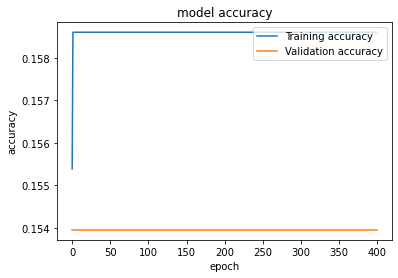

In [13]:
# accuracy history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper right')
plt.show()
#verdiği datanın ne kadar uzaktan öğrenmesi

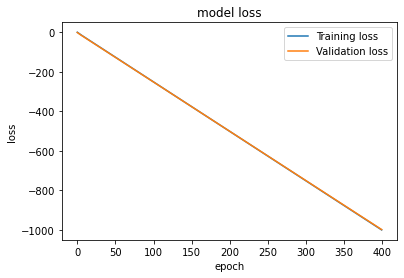

In [14]:
# loss history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()